# the case without noise

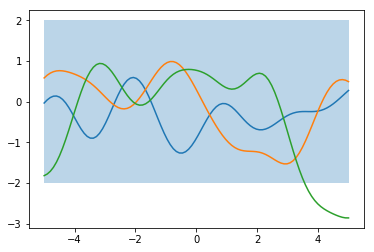

In [7]:
# 1d prior distribution
import numpy as np
import matplotlib.pyplot as plt

def cholesky(K):
    return np.linalg.cholesky(K)

def kernel(x1, x2):
    # given two vectors, return their covariance matrix
    s = 1
    l = 1
    return s**2 * np.exp(-1/(2*l) * (x1.reshape(-1,1) - x2.reshape(1,-1))**2)

def mu(x):
    return np.zeros(len(x))

X = np.linspace(-5, 5, 100)
K = kernel(X, X)
L = cholesky(K + np.eye(len(K))*1e-10) # L Lt = K

# sample y
for i in range(3):
    y = mu(X) + L.dot(np.random.randn(len(X)))
    plt.plot(X.ravel(), y.ravel())
    
std = np.sqrt(np.diag(K))
nstd = 2
plt.fill_between(X.ravel(), mu(X) + nstd*std, mu(X) - nstd*std, alpha=0.3)
plt.show()